# Importing Relevant Packages

In [148]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import squarify as sqrf
import seaborn as sns 
sns.set()

set colourmap


In [149]:
my_values=[i for i in range(1,20)]
my_values.reverse()
cmap = mpl.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = mpl.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]

# Reading and Allocating Data

In [150]:
id=pd.read_csv(r'C:\Users\user\OneDrive\Documentos\Tese\csv\id.csv',';')
ist=pd.read_csv(r'C:\Users\user\OneDrive\Documentos\Tese\csv\tecnico.csv',';')
comp=pd.read_csv(r'C:\Users\user\OneDrive\Documentos\Tese\csv\companies.csv',';')
df_id=id.copy()
df_ist=ist.copy()
df_comp=comp.copy()

In [151]:
df_id.head()

,id_pessoa,Idade,Sexo,Curso,ano_conclusao,criou_empresa,empresas_criadas,empresas_ativas
0,2,39,Male,Architecture,2007,Yes,1,1
1,3,25,Male,Civil Eng.,2019,Yes,1,1
2,4,29,Male,Industrial Management and Eng.,2015,Yes,1,1
3,5,35,Female,Eng. Physics,2007,Yes,1,1
4,6,52,Male,Civil Eng.,1993,Yes,2,1


In [152]:
df_comp.head()

,id_empresa,id_pessoa,ano_fundacao,apoios,apoios_espec,princ_activity,knowledge,market,foreign_market,employees,revenue,imports,exports
0,1,2,2018,Yes,Other Private Institutions,Architecture,No Technology,National,Europe,1-9,850000,5000,60000
1,3,4,2020,Yes,FFF,IT,Outside Technological Knowledge,National,Europe,1-9,100000,0,0
2,4,5,2020,No,NaN,IT,Outside Technological Knowledge,Foreign,Europe,1-9,7500,0,0
3,5,6,2000,Yes,University-Bank,IT,Outside Technological Knowledge,National,NaN,10-49,2000000,0,1000000
4,6,7,2017,No,NaN,Finance & Management,No Technology,National,Europe,1-9,200000,0,0


In [153]:
df_ist.head()

,id_pessoa,UC_empree,UC_impact,IST_events,IST_impact
0,2,Yes,3.0,None,3
1,3,Yes,4.0,Job Fairs-Government or Company Protocols-Alum...,4
2,4,Yes,2.0,None,3
3,5,Yes,2.0,Internship-Suporte aos Alumni,5
4,6,No,NaN,None,4


In [154]:
#to certify that all the companies are unique
money_df=df_comp[['ano_fundacao','princ_activity','market','employees','revenue','imports','exports']].copy()
money_df.value_counts()

ano_fundacao  princ_activity        market    employees  revenue  imports  exports
2020          Real Estate           National  1-9        30000    0        0          1
              IT Consulting         Foreign   1-9        800000   0        800000     1
2012          Finance & Management  National  10-49      1000000  0        30000      1
              IT                    Foreign   1-9        350000   0        350000     1
                                              10-49      2500000  0        0          1
                                                                                     ..
2018          Finance & Management  Foreign   10-49      250000   10000    0          1
              IT                    Foreign   1-9        100000   0        0          1
                                              10-49      1800000  0        1600000    1
                                    National  1-9        12000    0        0          1
1982          Retail                N

# Total Money Involved

In [155]:
total_revenue=df_comp['revenue'].sum()
total_exports=df_comp['exports'].sum()
total_imports=df_comp['imports'].sum()

print('Total Revenue=',total_revenue,'\nTotal Exports=',total_exports,'\nTotal Imports=',total_imports)

Total Revenue= 247875400 
Total Exports= 63988000 
Total Imports= 5160150


# Gender

In [156]:
times_male=0
times_female=0
for i in df_id['Sexo']:
    if i=='Male':
        times_male+=1
    else:
        times_female+=1

percentage_male=times_male/(times_male+times_female)*100
percentage_female=times_female/(times_female+times_male)*100
percentage_male=round(percentage_male,2)
percentage_female=round(percentage_female,2)
print(f'The percentage of male entrepreneurs is:{percentage_male}%\nThe percentage of female entrepreneurs is:{percentage_female}%')

The percentage of male entrepreneurs is:92.22%
The percentage of female entrepreneurs is:7.78%


# Resilience and Serial Entrepreneur

In [157]:
times_resilience=0
times_serial_entrepreneur=0
times_quiter=0
for j in range(len(df_id)):
    if df_id['empresas_criadas'][j]>df_id['empresas_ativas'][j]:
        times_resilience+=1
    if df_id['empresas_criadas'][j]>2:
        times_serial_entrepreneur+=1
    if df_id['empresas_ativas'][j]==0:
        times_quiter+=1

times_resilience, times_serial_entrepreneur,times_quiter
percentage_resil=round(times_resilience/len(df_id)*100,2)
percentage_quiter=round(times_quiter/len(df_id)*100,2)
percentage_serial=round(times_serial_entrepreneur/len(df_id)*100,2)
percentage_resil,percentage_quiter,percentage_serial

(38.89, 6.67, 25.56)

In [158]:
df_id['empresas_ativas'].value_counts()

1    56
2    17
3     7
0     6
6     3
4     1
Name: empresas_ativas, dtype: int64

In [159]:
df_id['empresas_criadas'].value_counts()

1    43
2    24
3     9
6     5
5     5
4     4
Name: empresas_criadas, dtype: int64

# Maturity

In [160]:
df_mat=df_comp.copy()
df_mat['conc_curso']=''
df_mat.head()

,id_empresa,id_pessoa,ano_fundacao,apoios,apoios_espec,princ_activity,knowledge,market,foreign_market,employees,revenue,imports,exports,conc_curso
0,1,2,2018,Yes,Other Private Institutions,Architecture,No Technology,National,Europe,1-9,850000,5000,60000,
1,3,4,2020,Yes,FFF,IT,Outside Technological Knowledge,National,Europe,1-9,100000,0,0,
2,4,5,2020,No,NaN,IT,Outside Technological Knowledge,Foreign,Europe,1-9,7500,0,0,
3,5,6,2000,Yes,University-Bank,IT,Outside Technological Knowledge,National,NaN,10-49,2000000,0,1000000,
4,6,7,2017,No,NaN,Finance & Management,No Technology,National,Europe,1-9,200000,0,0,


In [161]:
for m in range(len(df_mat)):
    for k in range(len(df_id)):
        if df_mat['id_pessoa'][m]==df_id['id_pessoa'][k]:
            df_mat['conc_curso'][m]=df_id['ano_conclusao'][k]

df_mat

<ipython-input-161-68188e8ff3a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mat['conc_curso'][m]=df_id['ano_conclusao'][k]


,id_empresa,id_pessoa,ano_fundacao,apoios,apoios_espec,princ_activity,knowledge,market,foreign_market,employees,revenue,imports,exports,conc_curso
0,1,2,2018,Yes,Other Private Institutions,Architecture,No Technology,National,Europe,1-9,850000,5000,60000,2007
1,3,4,2020,Yes,FFF,IT,Outside Technological Knowledge,National,Europe,1-9,100000,0,0,2015
2,4,5,2020,No,NaN,IT,Outside Technological Knowledge,Foreign,Europe,1-9,7500,0,0,2007
3,5,6,2000,Yes,University-Bank,IT,Outside Technological Knowledge,National,NaN,10-49,2000000,0,1000000,1993
4,6,7,2017,No,NaN,Finance & Management,No Technology,National,Europe,1-9,200000,0,0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,118,93,2017,Yes,Other Public Institutions-Other Private Instit...,Finance & Management,Acquired-in-IST Technology Knowledge,Foreign,Europe-Africa,10-49,250000,0,150000,2012
100,120,95,2012,No,NaN,IT,Acquired-in-IST Technology Knowledge,Foreign,Europe,1-9,350000,0,350000,2000
101,121,95,2015,No,NaN,IT,Acquired-in-IST Technology Knowledge,Foreign,Europe,1-9,400000,0,400000,2000
102,122,95,2013,No,NaN,Consulting,Acquired-in-IST Technology Knowledge,National,Europe,50-249,3500000,0,3500000,2000


In [162]:
df_mat['maturity']=df_mat['ano_fundacao']-df_mat['conc_curso']
for i in range(len(df_mat)):
    if df_mat['maturity'][i]<0:
        df_mat['maturity'][i]=0
df_mat.head()

<ipython-input-162-75b4a5239d8f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mat['maturity'][i]=0


,id_empresa,id_pessoa,ano_fundacao,apoios,apoios_espec,princ_activity,knowledge,market,foreign_market,employees,revenue,imports,exports,conc_curso,maturity
0,1,2,2018,Yes,Other Private Institutions,Architecture,No Technology,National,Europe,1-9,850000,5000,60000,2007,11
1,3,4,2020,Yes,FFF,IT,Outside Technological Knowledge,National,Europe,1-9,100000,0,0,2015,5
2,4,5,2020,No,NaN,IT,Outside Technological Knowledge,Foreign,Europe,1-9,7500,0,0,2007,13
3,5,6,2000,Yes,University-Bank,IT,Outside Technological Knowledge,National,NaN,10-49,2000000,0,1000000,1993,7
4,6,7,2017,No,NaN,Finance & Management,No Technology,National,Europe,1-9,200000,0,0,2010,7


In [163]:
avg_maturity=round(df_mat['maturity'].mean(),2)
print('The average maturity of an entrepreneur is:',avg_maturity)

The average maturity of an entrepreneur is: 11.69


### Maturity vs Revenue

In [164]:
df_matrev=df_mat[['maturity','revenue']]
df_matrev.head()

,maturity,revenue
0,11,850000
1,5,100000
2,13,7500
3,7,2000000
4,7,200000


<AxesSubplot:xlabel='maturity'>

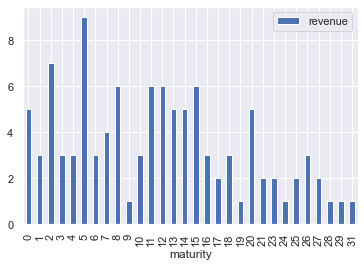

In [165]:
df_matrev.groupby('maturity').count().plot.bar()

Text(0, 0.5, 'Frequency')

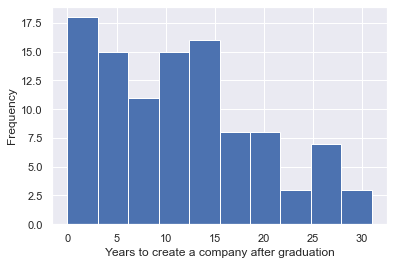

In [166]:
df_matrev['maturity'].hist(bins=10)
#plt.suptitle('Histogram of Maturity')
plt.xlabel('Years to create a company after graduation')
plt.ylabel('Frequency')

In [167]:
zero_three=0
four_seven=0
eight_eleven=0
twelve_fifteen=0
sixteen_nineteen=0
twenty_twentythree=0
twentyfour_twentyseven=0
twentyeight_thirtyone=0

for n in range(len(df_matrev)):
#0-3
    if df_matrev['maturity'][n]>=0 and df_matrev['maturity'][n]<4:

        zero_three += df_matrev['revenue'][n]
#4-7
    elif df_matrev['maturity'][n]>=4 and df_matrev['maturity'][n]<8:

        four_seven += df_matrev['revenue'][n]
#8-11
    elif df_matrev['maturity'][n]>=8 and df_matrev['maturity'][n]<12:

        eight_eleven += df_matrev['revenue'][n]
#12-15
    elif df_matrev['maturity'][n]>=12 and df_matrev['maturity'][n]<16:

        twelve_fifteen += df_matrev['revenue'][n] 
#16-19
    elif df_matrev['maturity'][n]>=16 and df_matrev['maturity'][n]<20:

        sixteen_nineteen += df_matrev['revenue'][n]    
#20-23
    elif df_matrev['maturity'][n]>=20 and df_matrev['maturity'][n]<24:

        twenty_twentythree += df_matrev['revenue'][n] 
#24-27
    elif df_matrev['maturity'][n]>=24 and df_matrev['maturity'][n]<28:

        twentyfour_twentyseven += df_matrev['revenue'][n]  
#24-27
    elif df_matrev['maturity'][n]>=28 and df_matrev['maturity'][n]<32:

        twentyeight_thirtyone += df_matrev['revenue'][n] 
rev_by_mat=[zero_three,four_seven,eight_eleven,twelve_fifteen,sixteen_nineteen,twenty_twentythree,twentyfour_twentyseven,twentyeight_thirtyone]
rev_by_mat_labels=['0-3','4-7','8-11','12-15','16-19','20-23','24-27','28-31']



In [168]:
#Para por em milhares de euros
rev_by_mat[:] = [x / 1000 for x in rev_by_mat]
rev_by_mat

[64880.0, 9257.4, 7015.0, 103852.5, 23230.0, 9173.0, 28717.5, 1750.0]

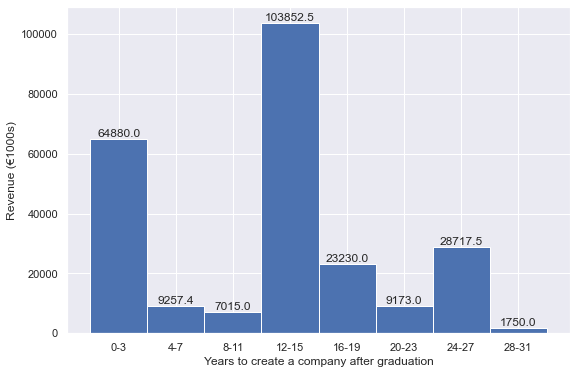

In [169]:
#Plotar

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(9, 6)

plt.bar(rev_by_mat_labels,rev_by_mat,width=1)
plt.ylabel("Revenue (€1000s)")
plt.xlabel('Years to create a company after graduation')

# Make some labels.
data_labels=['','','','','','','','']
for i in range(len(data_labels)):
    data_labels[i]=str(rev_by_mat[i])

rects = ax.patches

for rect, label in zip(rects, data_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

# Time in the market vs Revenue

In [170]:
df_tm=df_comp[['revenue']].copy()
df_tm['time_market']=2020-df_comp['ano_fundacao']
df_tm.head()

,revenue,time_market
0,850000,2
1,100000,0
2,7500,0
3,2000000,20
4,200000,3


In [171]:
frequency_time=df_tm['time_market'].value_counts()
frequency_time,frequency_time.sum()

(2     14
 1     13
 5     12
 0     10
 4      8
 3      6
 7      6
 8      6
 9      4
 6      3
 13     3
 11     3
 22     2
 19     2
 10     2
 38     1
 32     1
 14     1
 17     1
 20     1
 24     1
 27     1
 28     1
 31     1
 12     1
 Name: time_market, dtype: int64,
 104)

In [172]:
until_four=0 #creating the intervals for plots regarding the number of companies in such interval and pairing with their 
revenue_until_four=0

until_nine=0
revenue_until_nine=0

until_fourteen=0
revenue_until_fourteen=0

until_nineteen=0
revenue_until_nineteen=0

until_twentyfour=0
revenue_until_twentyfour=0

until_twentynine=0
revenue_until_twentynine=0

until_thirtyfour=0
revenue_until_thirtyfour=0

until_thirtynine=0
revenue_until_thirtynine=0

for i in range(len(df_tm)):
    if df_tm['time_market'][i]<=4: #until 4
        until_four+=1
        revenue_until_four+=df_tm['revenue'][i]

    elif df_tm['time_market'][i]>4 and df_tm['time_market'][i]<=9:  #until 9
        until_nine+=1
        revenue_until_nine+=df_tm['revenue'][i]

    elif df_tm['time_market'][i]>9 and df_tm['time_market'][i]<=14: #until 14
        until_fourteen+=1
        revenue_until_fourteen+=df_tm['revenue'][i]

    elif df_tm['time_market'][i]>14 and df_tm['time_market'][i]<=19: # until 19
        until_nineteen+=1
        revenue_until_nineteen+=df_tm['revenue'][i]

    elif df_tm['time_market'][i]>19 and df_tm['time_market'][i]<=24: # until 24
        until_twentyfour+=1
        revenue_until_twentyfour+=df_tm['revenue'][i]

    elif df_tm['time_market'][i]>24 and df_tm['time_market'][i]<=29: # until 29
        until_twentynine+=1
        revenue_until_twentynine+=df_tm['revenue'][i]

    elif df_tm['time_market'][i]>29 and df_tm['time_market'][i]<=34: # until 34
        until_thirtyfour+=1
        revenue_until_thirtyfour+=df_tm['revenue'][i]

    elif df_tm['time_market'][i]>34 and df_tm['time_market'][i]<=39: # until 39
        until_thirtynine+=1
        revenue_until_thirtynine+=df_tm['revenue'][i]



In [173]:
ttime_market=[until_four,until_nine,until_fourteen,until_nineteen, until_twentyfour, until_twentynine,until_thirtyfour,until_thirtynine]

total_companies_time=sum(ttime_market)

percentage_time_market=[x / total_companies_time *100 for x in ttime_market]

revenue_time_market=[revenue_until_four,revenue_until_nine,revenue_until_fourteen,revenue_until_nineteen,revenue_until_twentyfour,revenue_until_twentynine,revenue_until_thirtyfour,revenue_until_thirtynine]
mil=1000

revenue_time_market[:] = [x / mil for x in revenue_time_market]

average_revenue_time_market=[b/m for b,m in zip(revenue_time_market,ttime_market)]

df_time=pd.DataFrame({'Companies (%)':percentage_time_market,
                        'Revenue  (1000s)':revenue_time_market,
                        'Average Revenue (00s)':average_revenue_time_market},
                        index=['Until 4','5-9','10-14','15-19','20-24','24-29','30-34','35-39'])
df_time.columns.names=['Years in the Market']

In [174]:
df_time=round(df_time,2)
df_time

Years in the Market,Companies (%),Revenue (1000s),Average Revenue (00s)
Until 4,49.04,15062.9,295.35
5-9,29.81,52922.5,1707.18
10-14,9.62,50510.0,5051.00
15-19,2.88,10530.0,3510.00
20-24,3.85,69000.0,17250.00
24-29,1.92,46500.0,23250.00
30-34,1.92,1350.0,675.00
35-39,0.96,2000.0,2000.00


In [175]:
fig = plt.gcf()
fig.set_size_inches(9, 6)

df_time[['Revenue (€1000s)','Average Revenue (€1000s)']].plot(kind='bar')
df_time['Companies (%)'].plot(secondary_y=True)

KeyError: "None of [Index(['Revenue (€1000s)', 'Average Revenue (€1000s)'], dtype='object', name='Years in the Market')] are in the [columns]"

# Plot Courses Frequency

In [121]:
freq_courses=df_id['Curso'].value_counts()
print(freq_courses)

Electrical and Computer Eng.      21
Computer Science and Eng.         15
Mechanical Eng.                   13
Civil Eng.                        11
Aerospace Eng.                     5
Chemistry Eng.                     5
Biomedical Eng.                    4
Architecture                       4
Industrial Management and Eng.     3
Eng. Physics                       2
Biological Eng.                    2
Energy Management and Eng.         1
Naval Eng.                         1
Environmental Engineering          1
Applied Mathematics                1
Materials Eng.                     1
Name: Curso, dtype: int64


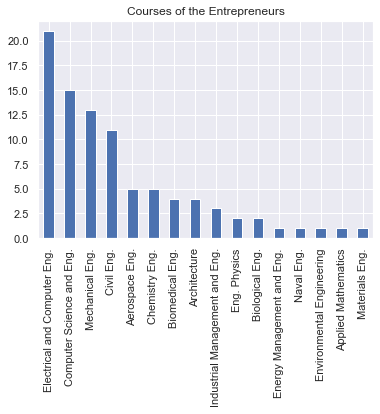

In [122]:
freq_courses.plot(kind='bar',title='Courses of the Entrepreneurs')
plt.show()

In [123]:
freq_courses.index=['Electrical \nand Computer Eng.','Computer Science and Eng.','Mechanical Eng.','Civil Eng.','Aerospace Eng.','Chemistry Eng.','Biomedical Eng.','Architecture','Industrial Management \nand Eng.','Biological Eng.','Eng. Physics','Environmental \n Eng.','Naval Eng.','Energy Management\nand Eng.','Applied Maths','Materials Eng.']

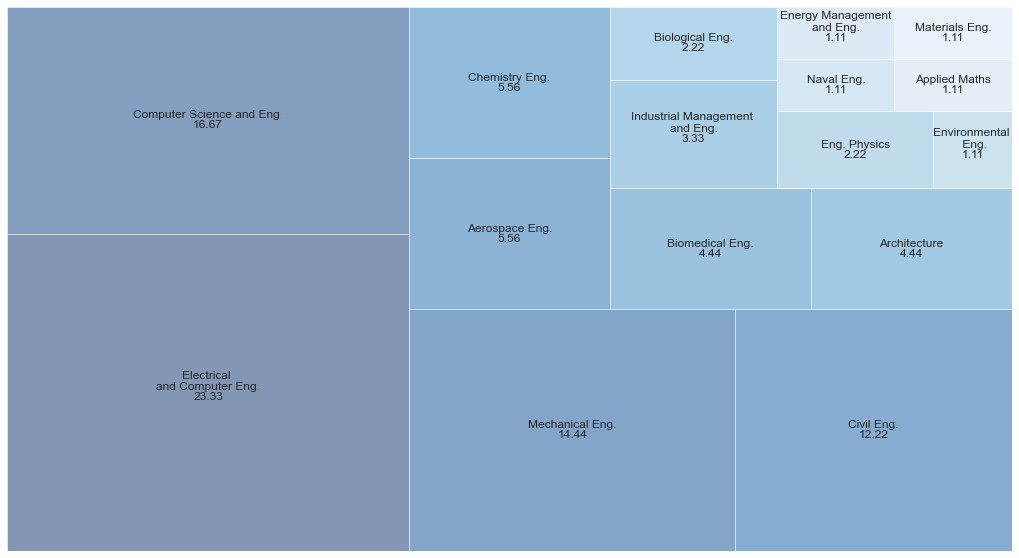

In [124]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(18, 10)


fig=sqrf.plot(freq_courses,label=freq_courses.index,value=round(freq_courses/freq_courses.sum()*100,2),color=colors,alpha=0.5 )

plt.axis('off')
plt.show()

# Plot Principal Activity

In [125]:
freq_act=df_comp['princ_activity'].value_counts()
print(freq_act)

IT                      23
Consulting              22
IT Consulting           14
Finance & Management    12
Engineering              8
Tourism                  4
Retail                   4
Architecture             4
Entertainment            3
Real Estate              3
Healthcare               3
Transports               2
R&D                      1
Marketing                1
Name: princ_activity, dtype: int64


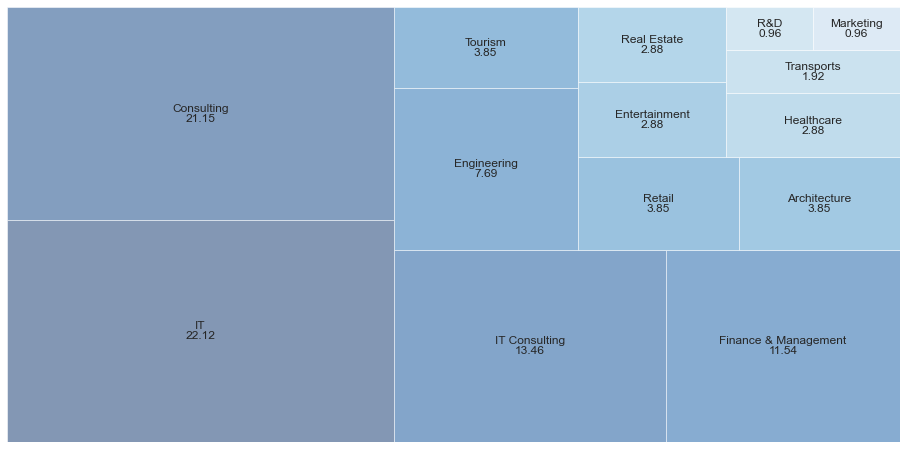

In [126]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 8)

fig=sqrf.plot(freq_act,label=freq_act.index,value=round(freq_act/freq_act.sum()*100,2),color=colors,alpha=0.5 )

plt.axis('off')
plt.show()

In [132]:
times_it=0
times_consulting=0
times_itconsulting=0
times_manfin=0
times_eng=0
times_arch=0
times_retail=0
times_tourism=0
times_entertainment=0
times_transp=0
times_health=0
times_mkt=0
times_rd=0
times_re=0

revenue_it=0
revenue_consulting=0
revenue_itconsulting=0
revenue_manfin=0
revenue_eng=0
revenue_arch=0
revenue_retail=0
revenue_tourism=0
revenue_entertainment=0
revenue_transp=0
revenue_health=0
revenue_mkt=0
revenue_rd=0
revenue_re=0

exports_it=0
exports_consulting=0
exports_itconsulting=0
exports_manfin=0
exports_eng=0
exports_arch=0
exports_retail=0
exports_tourism=0
exports_entertainment=0
exports_transp=0
exports_health=0
exports_mkt=0
exports_rd=0
exports_re=0

imports_it=0
imports_consulting=0
imports_itconsulting=0
imports_manfin=0
imports_eng=0
imports_arch=0
imports_retail=0
imports_tourism=0
imports_entertainment=0
imports_transp=0
imports_health=0
imports_mkt=0
imports_rd=0
imports_re=0

for i in range(len(df_comp)):
    if df_comp['princ_activity'][i]=='IT':
        times_it+=1
        revenue_it+=df_comp['revenue'][i]
        exports_it+=df_comp['exports'][i]
        imports_it+=df_comp['imports'][i]

    elif df_comp['princ_activity'][i]=='Consulting':
        times_consulting+=1
        revenue_consulting+=df_comp['revenue'][i]
        exports_consulting+=df_comp['exports'][i]
        imports_consulting+=df_comp['imports'][i]

    elif df_comp['princ_activity'][i]=='IT Consulting':
        times_itconsulting+=1
        revenue_itconsulting+=df_comp['revenue'][i]
        exports_itconsulting+=df_comp['exports'][i]
        imports_itconsulting+=df_comp['imports'][i]
    
    elif df_comp['princ_activity'][i]=='Finance & Management':
        times_manfin+=1
        revenue_manfin+=df_comp['revenue'][i]
        exports_manfin+=df_comp['exports'][i]
        imports_manfin+=df_comp['imports'][i]

    elif df_comp['princ_activity'][i]=='Engineering':
        times_eng+=1
        revenue_eng+=df_comp['revenue'][i]
        exports_eng+=df_comp['exports'][i]
        imports_eng+=df_comp['imports'][i]

    elif df_comp['princ_activity'][i]=='Architecture':
        times_arch+=1
        revenue_arch+=df_comp['revenue'][i]
        exports_arch+=df_comp['exports'][i]
        imports_arch+=df_comp['imports'][i]

    elif df_comp['princ_activity'][i]=='Retail':
        times_retail+=1
        revenue_retail+=df_comp['revenue'][i]
        exports_retail+=df_comp['exports'][i]
        imports_retail+=df_comp['imports'][i]

    elif df_comp['princ_activity'][i]=='Tourism':
        times_tourism+=1
        revenue_tourism+=df_comp['revenue'][i]
        exports_tourism+=df_comp['exports'][i]
        imports_tourism+=df_comp['imports'][i]

    elif df_comp['princ_activity'][i]=='Entertainment':
        times_entertainment+=1
        revenue_entertainment+=df_comp['revenue'][i]
        exports_entertainment+=df_comp['exports'][i]
        imports_entertainment+=df_comp['imports'][i]

    elif df_comp['princ_activity'][i]=='Transports':
        times_transp+=1
        revenue_transp+=df_comp['revenue'][i]
        exports_transp+=df_comp['exports'][i]
        imports_transp+=df_comp['imports'][i]

    elif df_comp['princ_activity'][i]=='Healthcare':
        times_health+=1
        revenue_health+=df_comp['revenue'][i]
        exports_health+=df_comp['exports'][i]
        imports_health+=df_comp['imports'][i]

    elif df_comp['princ_activity'][i]=='Marketing':
        times_mkt+=1
        revenue_mkt+=df_comp['revenue'][i]
        exports_mkt+=df_comp['exports'][i]
        imports_mkt+=df_comp['imports'][i]

    elif df_comp['princ_activity'][i]=='R&D':
        times_rd+=1
        revenue_rd+=df_comp['revenue'][i]
        exports_rd+=df_comp['exports'][i]
        imports_rd+=df_comp['imports'][i]

    elif df_comp['princ_activity'][i]=='Real Estate':
        times_re+=1
        revenue_re+=df_comp['revenue'][i]
        exports_re+=df_comp['exports'][i]
        imports_re+=df_comp['imports'][i]



In [142]:
# TIMES

#array times
times_princ_act=[times_it,times_consulting,times_itconsulting,times_manfin,times_eng,times_arch,times_retail,times_tourism,times_entertainment,times_health,times_re,times_transp,times_mkt,times_rd]
# total de empresas
total_princ_act=sum(times_princ_act)
# percentagem das empresas
percentage_princ_act=[x / total_princ_act *100 for x in times_princ_act]

#total dos percentage
total_percentage_princ_act=sum(percentage_princ_act)

#appends
#companies_princ_act=percentage_princ_act.extend(total_percentage_princ_act)

# REVENUE

#array revenue
revenue_princ_act=[revenue_it,revenue_consulting,revenue_itconsulting,revenue_manfin,revenue_eng,revenue_arch,revenue_retail,revenue_tourism,revenue_entertainment,revenue_health,revenue_re,revenue_transp,revenue_mkt,revenue_rd]

# dividir por mil
revenue_princ_act[:] = [u / mil for u in revenue_princ_act]

#total dos revenues
total_revenue_princ_act=sum(revenue_princ_act)

# market dominance
percentage_revenue_princ_act=[w / total_revenue_princ_act *100 for w in revenue_princ_act]

#total dos percentage
total_percentage_revenue_princ_act=sum(percentage_revenue_princ_act)

#appends
#revenue_princ_act=revenue_princ_act.extend(total_revenue_princ_act)
#percentage_revenue_princ_activity=percentage_revenue_princ_act.extend(total_percentage_revenue_princ_act)

# EXPORTS

#array exports
exports_princ_act=[exports_it,exports_consulting,exports_itconsulting,exports_manfin,exports_eng,exports_arch,exports_retail,exports_tourism,exports_entertainment,exports_health,exports_re,exports_transp,exports_mkt,exports_rd]

# dividir por mil
exports_princ_act[:] = [m / mil for m in exports_princ_act]

#total dos exports
total_exports_princ_act=sum(exports_princ_act)

# exports dominance
percentage_exports_princ_act=[n / total_exports_princ_act *100 for n in exports_princ_act]

#total dos percentage
total_percentage_exports_princ_act=sum(percentage_exports_princ_act)

#appends
#exports_princ_act=exports_princ_act.extend(total_exports_princ_act)
#percentage_exports_princ_act=percentage_exports_princ_act.extend(total_percentage_exports_princ_act)

# IMPORTS

#array imports
imports_princ_act=[imports_it,imports_consulting,imports_itconsulting,imports_manfin,imports_eng,imports_arch,imports_retail,imports_tourism,imports_entertainment,imports_health,imports_re,imports_transp,imports_mkt,imports_rd]

# dividir por mil
imports_princ_act[:] = [y / mil for y in imports_princ_act]

#total dos imports
total_imports_princ_act=sum(imports_princ_act)

# import dominance
percentage_imports_princ_act=[z / total_imports_princ_act *100 for z in imports_princ_act]

#total dos percentage
total_percentage_imports_princ_act=sum(percentage_imports_princ_act)

#appends
#imports_princ_act=imports_princ_act.extend(total_imports_princ_act)
#percentage_imports_princ_act=percentage_imports_princ_act.extend(total_percentage_imports_princ_act)

In [143]:
df_princ_act=pd.DataFrame({'Companies (%)':percentage_princ_act,
                            'Revenue (€1000s)':revenue_princ_act,
                            'Market (Revenue) Dominance (%)':percentage_revenue_princ_act,
                            'Exports (€1000s)':exports_princ_act,
                            'Exports Dominance (%)':percentage_exports_princ_act,
                            'Imports (€1000s)':imports_princ_act,
                            'Imports Dominance (%)':percentage_imports_princ_act},
                        index=['IT','Consulting','IT Consulting','Finance & Management','Engineering','Architecture','Retail','Tourism','Entertainment','Healthcare','Real Estate','Transports','Marketing','R&D'])
df_princ_act.columns.names=['Activities']
df_princ_act=round(df_princ_act,2)

In [144]:
df_princ_act

Activities,Companies (%),Revenue (€1000s),Market (Revenue) Dominance (%),Exports (€1000s),Exports Dominance (%),Imports (€1000s),Imports Dominance (%)
IT,22.12,90704.5,36.59,20604.0,32.20,881.00,17.07
Consulting,21.15,40921.0,16.51,3852.0,6.02,104.00,2.02
IT Consulting,13.46,35365.4,14.27,7930.0,12.39,1053.00,20.41
Finance & Management,11.54,68800.0,27.76,27490.0,42.96,1563.00,30.29
Engineering,7.69,2040.0,0.82,920.0,1.44,130.00,2.52
Architecture,3.85,1115.0,0.45,75.0,0.12,25.00,0.48
Retail,3.85,2180.0,0.88,507.0,0.79,1000.00,19.38
Tourism,3.85,980.0,0.40,110.0,0.17,50.00,0.97
Entertainment,2.88,189.5,0.08,0.0,0.00,4.15,0.08
Healthcare,2.88,300.0,0.12,0.0,0.00,0.00,0.00


In [146]:
df_princ_act_total=pd.DataFrame({'Companies (%)':total_percentage_revenue_princ_act,
                            'Revenue (€1000s)':total_revenue_princ_act,
                            'Market (Revenue) Dominance (%)':total_percentage_revenue_princ_act,
                            'Exports (€1000s)':total_exports_princ_act,
                            'Exports Dominance (%)':total_percentage_exports_princ_act,
                            'Imports (€1000s)':total_imports_princ_act,
                            'Imports Dominance (%)':total_percentage_imports_princ_act},
                             index=['Total'])
df_princ_act=df_princ_act.append(df_princ_act_total)
df_princ_act

Activities,Companies (%),Revenue (€1000s),Market (Revenue) Dominance (%),Exports (€1000s),Exports Dominance (%),Imports (€1000s),Imports Dominance (%)
IT,22.12,90704.5,36.59,20604.0,32.20,881.00,17.07
Consulting,21.15,40921.0,16.51,3852.0,6.02,104.00,2.02
IT Consulting,13.46,35365.4,14.27,7930.0,12.39,1053.00,20.41
Finance & Management,11.54,68800.0,27.76,27490.0,42.96,1563.00,30.29
Engineering,7.69,2040.0,0.82,920.0,1.44,130.00,2.52
Architecture,3.85,1115.0,0.45,75.0,0.12,25.00,0.48
Retail,3.85,2180.0,0.88,507.0,0.79,1000.00,19.38
Tourism,3.85,980.0,0.40,110.0,0.17,50.00,0.97
Entertainment,2.88,189.5,0.08,0.0,0.00,4.15,0.08
Healthcare,2.88,300.0,0.12,0.0,0.00,0.00,0.00


# Number of Employees vs Technology Based Company in Revenue

In [127]:
# No tech
onenine_notech=0
tenfifty_notech=0
fiftytwofifty_notech=0
twofiftyplus_notech=0
#non-ist tech
onenine_nonisttech=0
tenfifty_nonisttech=0
fiftytwofifty_nonisttech=0
twofiftyplus_nonisttech=0
#ist tech
onenine_isttech=0
tenfifty_isttech=0
fiftytwofifty_isttech=0
twofiftyplus_isttech=0

for a in range(len(df_comp)):

#### No Tech
    if df_comp['knowledge'][a]=='No Technology' and df_comp['employees'][a]=='1-9':
        onenine_notech += df_comp['revenue'][a]

    elif df_comp['knowledge'][a]=='No Technology' and df_comp['employees'][a]=='10-49':
        tenfifty_notech += df_comp['revenue'][a]

    elif df_comp['knowledge'][a]=='No Technology' and df_comp['employees'][a]=='50-249':
        fiftytwofifty_notech += df_comp['revenue'][a]

    elif df_comp['knowledge'][a]=='No Technology' and df_comp['employees'][a]=='250+':
        twofiftyplus_notech += df_comp['revenue'][a]

#### Non-IST Tech
    elif df_comp['knowledge'][a]=='Outside Technological Knowledge' and df_comp['employees'][a]=='1-9':
        onenine_nonisttech += df_comp['revenue'][a]

    elif df_comp['knowledge'][a]=='Outside Technological Knowledge' and df_comp['employees'][a]=='10-49':
        tenfifty_nonisttech += df_comp['revenue'][a]

    elif df_comp['knowledge'][a]=='Outside Technological Knowledge' and df_comp['employees'][a]=='50-249':
        fiftytwofifty_nonisttech += df_comp['revenue'][a]

    elif df_comp['knowledge'][a]=='Outside Technological Knowledge' and df_comp['employees'][a]=='250+':
        twofiftyplus_nonisttech += df_comp['revenue'][a]

#### IST Tech
    elif df_comp['knowledge'][a]=='Acquired-in-IST Technology Knowledge' and df_comp['employees'][a]=='1-9':
        onenine_isttech += df_comp['revenue'][a]

    elif df_comp['knowledge'][a]=='Acquired-in-IST Technology Knowledge' and df_comp['employees'][a]=='10-49':
        tenfifty_isttech += df_comp['revenue'][a]

    elif df_comp['knowledge'][a]=='Acquired-in-IST Technology Knowledge' and df_comp['employees'][a]=='50-249':
        fiftytwofifty_isttech += df_comp['revenue'][a]

    elif df_comp['knowledge'][a]=='Acquired-in-IST Technology Knowledge' and df_comp['employees'][a]=='250+':
        twofiftyplus_isttech += df_comp['revenue'][a]

#### totals
total_notech = onenine_notech + tenfifty_notech + fiftytwofifty_notech + twofiftyplus_notech
total_nonisttech = onenine_nonisttech + tenfifty_nonisttech + fiftytwofifty_nonisttech + twofiftyplus_nonisttech
total_isttech = onenine_isttech + tenfifty_isttech + fiftytwofifty_isttech + twofiftyplus_isttech

#### Percentages

times_one=0
times_ten=0
times_fifty=0
times_twofifty=0

for i in df_comp['employees']:
    if i=='1-9':
        times_one+=1
    elif i=='10-49':
        times_ten+=1
    elif i=='50-249':
        times_fifty+=1
    elif i=='250+':
        times_twofifty+=1

percentage_one=times_one/(times_one+times_ten+times_fifty+times_twofifty)*100
percentage_ten=times_ten/(times_one+times_ten+times_fifty+times_twofifty)*100
percentage_fifty=times_fifty/(times_one+times_ten+times_fifty+times_twofifty)*100
percentage_twofifty=times_twofifty/(times_one+times_ten+times_fifty+times_twofifty)*100

percentage_one=round(percentage_one,2)
percentage_ten=round(percentage_ten,2)
percentage_fifty=round(percentage_fifty,2)
percentage_twofifty=round(percentage_twofifty,2)

df_emptech=pd.DataFrame({'Companies (%)':[percentage_one,percentage_ten,percentage_fifty,percentage_twofifty,
                            round(percentage_one+percentage_ten+percentage_fifty+percentage_twofifty,2)],
                            'No Technology(€1000s)':[onenine_notech/1000,
                                tenfifty_notech/1000,
                                fiftytwofifty_notech/1000,
                                twofiftyplus_notech/1000,
                                total_notech/1000],
                            'Outside Technological Knowledge(€1000s)':[onenine_nonisttech/1000,
                                tenfifty_nonisttech/1000,
                                fiftytwofifty_nonisttech/1000,
                                twofiftyplus_nonisttech/1000,
                                total_nonisttech/1000],
                            'Acquired-in-IST Technology Knowledge(€1000s)':[onenine_isttech/1000,
                                tenfifty_isttech/1000,
                                fiftytwofifty_isttech/1000,
                                twofiftyplus_isttech/1000,
                                total_isttech/1000],
                            'Total(€1000s)':[(onenine_notech + onenine_nonisttech + onenine_isttech)/1000,
                                (tenfifty_notech + tenfifty_nonisttech + tenfifty_isttech)/1000,
                                (fiftytwofifty_notech + fiftytwofifty_nonisttech + fiftytwofifty_isttech)/1000,
                                (twofiftyplus_notech + twofiftyplus_nonisttech + twofiftyplus_isttech)/1000,
                                (total_notech + total_nonisttech + total_isttech)/1000]},
                            index=['1-9','10-49','50-249','250+','Total'])
df_emptech.columns.names=['Number of Employees']
df_emptech

Number of Employees,Companies (%),No Technology(€1000s),Outside Technological Knowledge(€1000s),Acquired-in-IST Technology Knowledge(€1000s),Total(€1000s)
1-9,66.35,7653.0,2862.0,5550.4,16065.4
10-49,20.19,0.0,19130.0,19880.0,39010.0
50-249,8.65,6000.0,3000.0,32800.0,41800.0
250+,4.81,71000.0,20000.0,60000.0,151000.0
Total,100.00,84653.0,44992.0,118230.4,247875.4


In [128]:
df_comp['knowledge'].value_counts()

Acquired-in-IST Technology Knowledge    53
Outside Technological Knowledge         27
No Technology                           24
Name: knowledge, dtype: int64

# Evolução da criação de empresas

In [179]:
ano=df_comp['ano_fundacao'].value_counts()
ano

2018    14
2019    13
2015    12
2020    10
2016     8
2012     6
2017     6
2013     6
2011     4
2009     3
2014     3
2007     3
2010     2
2001     2
1998     2
1993     1
1988     1
1989     1
1992     1
2008     1
1996     1
2000     1
2003     1
2006     1
1982     1
Name: ano_fundacao, dtype: int64

In [180]:
ano=ano.sort_index()
ano

1982     1
1988     1
1989     1
1992     1
1993     1
1996     1
1998     2
2000     1
2001     2
2003     1
2006     1
2007     3
2008     1
2009     3
2010     2
2011     4
2012     6
2013     6
2014     3
2015    12
2016     8
2017     6
2018    14
2019    13
2020    10
Name: ano_fundacao, dtype: int64

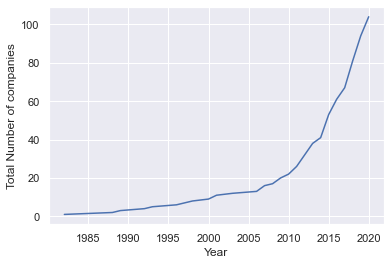

In [181]:
total_evo_emp=ano.copy()
total_evo_emp=total_evo_emp.reset_index(drop=True)
for c in range(len(total_evo_emp)):
    if c !=0:
        total_evo_emp[c]=total_evo_emp[c]+total_evo_emp[c-1]
total_evo_emp.index=ano.index

plt.plot(total_evo_emp.index, total_evo_emp.values)
plt.ylabel('Total Number of companies')
plt.xlabel('Year')
plt.show()

In [182]:
total_evo_emp

1982      1
1988      2
1989      3
1992      4
1993      5
1996      6
1998      8
2000      9
2001     11
2003     12
2006     13
2007     16
2008     17
2009     20
2010     22
2011     26
2012     32
2013     38
2014     41
2015     53
2016     61
2017     67
2018     81
2019     94
2020    104
Name: ano_fundacao, dtype: int64

# IST

In [132]:
df_ist.head()

,id_pessoa,UC_empree,UC_impact,IST_events,IST_impact
0,2,Yes,3.0,None,3
1,3,Yes,4.0,Job Fairs-Government or Company Protocols-Alum...,4
2,4,Yes,2.0,None,3
3,5,Yes,2.0,Internship-Suporte aos Alumni,5
4,6,No,NaN,None,4


In [133]:
times_yes_entre=0
times_no_entre=0
for i in df_ist['UC_empree']:
    if i=='Yes':
        times_yes_entre+=1
    else:
        times_no_entre+=1
percentage_yes_entre=round(times_yes_entre/(times_yes_entre+times_no_entre)*100,2)
percentage_no_entre=round(times_no_entre/(times_yes_entre+times_no_entre)*100,2)

print('The percentage of entrepreneurs who registered in a curricular unit on Entrepreneursship is:',percentage_yes_entre)

The percentage of entrepreneurs who registered in a curricular unit on Entrepreneursship is: 20.24


In [134]:
#just to check
times_yes_entre+times_no_entre

84

In [135]:
times_yes_entre_two=0
times_no_entre_two=0
for m in range(len(df_ist)):
    for k in range(len(df_id)):
        if df_ist['id_pessoa'][m]==df_id['id_pessoa'][k]:
            if df_id['ano_conclusao'][k]>=2006 and df_ist['UC_empree'][m]=='Yes':
                times_yes_entre_two+=1
            elif df_id['ano_conclusao'][k]>=2006 and df_ist['UC_empree'][m]=='No':
                times_no_entre_two+=1

percentage_yes_entre_two=round(times_yes_entre_two/(times_yes_entre_two+times_no_entre_two)*100,2)
percentage_no_entre_two=round(times_no_entre_two/(times_yes_entre_two+times_no_entre_two)*100,2)

print('The percentage of entrepreneurs who graduated after 2006 and registered in a curricular unit on Entrepreneursship is:',percentage_yes_entre_two)

The percentage of entrepreneurs who graduated after 2006 and registered in a curricular unit on Entrepreneursship is: 22.5


# UC and IST Impact

In [136]:
df_ist['UC_impact'].describe()

count    18.000000
mean      3.111111
std       0.963382
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: UC_impact, dtype: float64

In [137]:
df_ist['IST_impact'].describe()

count    84.000000
mean      2.857143
std       1.363402
min       1.000000
25%       1.750000
50%       3.000000
75%       4.000000
max       5.000000
Name: IST_impact, dtype: float64

# Support

In [138]:
support=df_comp['apoios'].value_counts()
support

No     82
Yes    22
Name: apoios, dtype: int64

In [139]:
percentage_support=round(support['Yes']/(support['Yes']+support['No'])*100,2)
percentage_support

21.15

In [140]:
support_revenue=0
support_year=[]
no_support_revenue=0

for i in range(len(df_comp)):
    if df_comp['apoios'][i]=='Yes':
        support_revenue+=df_comp['revenue'][i]
        support_year=np.append(support_year,df_comp['ano_fundacao'][i])
    elif df_comp['apoios'][i]=='No':
        no_support_revenue+=df_comp['revenue'][i]

avg_support_revenue=support_revenue/22
avg_no_support_revenue=no_support_revenue/82

round(avg_support_revenue,2),round(avg_no_support_revenue,2)


(5313972.73, 1597170.73)

In [141]:
series_support_year=pd.Series(support_year)
evo_support=series_support_year.value_counts()
evo_support

2016.0    4
2017.0    2
2012.0    2
2007.0    2
2015.0    2
2020.0    2
2018.0    2
1992.0    1
2001.0    1
1998.0    1
2019.0    1
2010.0    1
2000.0    1
dtype: int64

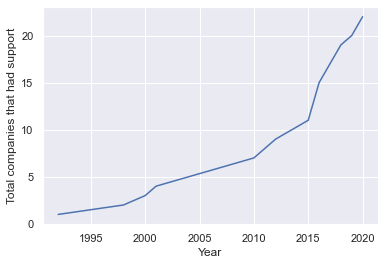

In [142]:
evo_support=evo_support.sort_index()
total_evo_sup=evo_support.copy()
total_evo_sup=total_evo_sup.reset_index(drop=True)
for c in range(len(total_evo_sup)):
    if c !=0:
        total_evo_sup[c]=total_evo_sup[c]+total_evo_sup[c-1]
total_evo_sup.index=evo_support.index

plt.plot(total_evo_sup.index, total_evo_sup.values)
plt.ylabel('Total companies that had support')
plt.xlabel('Year')
plt.show()

# Markets, Imports and Exports

In [143]:
markets_df=df_comp[['id_empresa','id_pessoa','ano_fundacao','princ_activity','market','foreign_market','revenue','imports','exports']].copy()
markets_df['Curso']=''
for m in range(len(markets_df)):
    for d in range(len(df_id)):
        if markets_df['id_pessoa'][m]==df_id['id_pessoa'][d]:
            markets_df['Curso'][m]=df_id['Curso'][d]
markets_df['foreign_market']=markets_df['foreign_market'].astype(str)

<ipython-input-143-b260457b0350>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  markets_df['Curso'][m]=df_id['Curso'][d]


In [144]:
markets_df['market'].value_counts()

National    70
Foreign     34
Name: market, dtype: int64

In [145]:

times_national=0
times_foreign=0
times_europe=0
times_SCA=0
times_NA=0
times_PALOP=0
times_asia=0
times_africa=0
times_oceania=0
times_others=0

revenues_national=0
revenues_foreign=0
revenues_europe=0
revenues_SCA=0
revenues_NA=0
revenues_PALOP=0
revenues_asia=0
revenues_africa=0
revenues_oceania=0
revenues_others=0

exports_national=0
exports_foreign=0
exports_europe=0
exports_SCA=0
exports_NA=0
exports_PALOP=0
exports_asia=0
exports_africa=0
exports_oceania=0
exports_others=0

imports_national=0
imports_foreign=0

for i in range(len(markets_df)):
#foco nos mercados predominantes
    if markets_df['market'][i]=='National':
        times_national+=1
        revenues_national+=markets_df['revenue'][i]
        exports_national+=markets_df['exports'][i]
        imports_national+=markets_df['imports'][i]

    elif markets_df['market'][i]=='Foreign':
        times_foreign+=1
        revenues_foreign+=markets_df['revenue'][i]
        exports_foreign+=markets_df['exports'][i]
        imports_foreign+=markets_df['imports'][i]

# foco nos mercados estrangeiros
    if markets_df['foreign_market'][i].find('-')==-1: #só tem um mercado para o qual exporta

        if markets_df['foreign_market'][i]=='Europe': #Europe
            times_europe+=1
            revenues_europe+=markets_df['revenue'][i]
            exports_europe+=markets_df['exports'][i]        

        elif markets_df['foreign_market'][i]=='South and Central America': #SCA
            times_SCA+=1
            revenues_SCA+=markets_df['revenue'][i]
            exports_SCA+=markets_df['exports'][i]

        elif markets_df['foreign_market'][i]=='North America': #NA
            times_NA+=1
            revenues_NA+=markets_df['revenue'][i]
            exports_NA+=markets_df['exports'][i]

        elif markets_df['foreign_market'][i]=='PALOP': #PALOP
            times_PALOP+=1
            revenues_PALOP+=markets_df['revenue'][i]
            exports_PALOP+=markets_df['exports'][i]

        elif markets_df['foreign_market'][i]=='Asia': #Asia
            times_asia+=1
            revenues_asia+=markets_df['revenue'][i]
            exports_asia+=markets_df['exports'][i]

        elif markets_df['foreign_market'][i]=='Africa': #Africa
            times_africa+=1
            revenues_africa+=markets_df['revenue'][i]
            exports_africa+=markets_df['exports'][i]

        elif markets_df['foreign_market'][i]=='Oceânia': #oceania
            times_oceania+=1
            revenues_oceania+=markets_df['revenue'][i]
            exports_oceania+=markets_df['exports'][i]

        else:                                              #no foreign market
            times_others+=1
            revenues_others+=markets_df['revenue'][i]
            exports_others+=markets_df['exports'][i]

    elif markets_df['foreign_market'][i].find('-')!=-1: #exporta para mais que um mercado

        markets_array=markets_df['foreign_market'][i].split('-') # split the string into the different markets

        for a in range(len(markets_array)):
            if markets_array[a]=='Europe': #Europe
                times_europe+=1
                revenues_europe+=round(markets_df['revenue'][i]/len(markets_array),2)
                exports_europe+=round(markets_df['exports'][i]/len(markets_array),2)

            elif markets_array[a]=='South and Central America': #SCA
                times_SCA+=1
                revenues_SCA+=round(markets_df['revenue'][i]/len(markets_array),2)
                exports_SCA+=round(markets_df['exports'][i]/len(markets_array),2)  

            elif markets_array[a]=='North America': #NA
                times_NA+=1
                revenues_NA+=round(markets_df['revenue'][i]/len(markets_array),2)
                exports_NA+=round(markets_df['exports'][i]/len(markets_array),2) 

            elif markets_array[a]=='Asia': #Asia
                times_asia+=1
                revenues_asia+=round(markets_df['revenue'][i]/len(markets_array),2)
                exports_asia+=round(markets_df['exports'][i]/len(markets_array),2)

            elif markets_array[a]=='Africa': #Africa
                times_africa+=1
                revenues_africa+=round(markets_df['revenue'][i]/len(markets_array),2)
                exports_africa+=round(markets_df['exports'][i]/len(markets_array),2)

In [146]:
# Predominant market
percentage_national=times_national/(times_national+times_foreign)*100
percentage_foreign=times_foreign/(times_national+times_foreign)*100

        # Market Dominance
percentage_revenues_national=revenues_national/(revenues_national+revenues_foreign)*100
percentage_revenues_foreign=revenues_foreign/(revenues_national+revenues_foreign)*100

        # Exports dominance
percentage_exports_national=exports_national/(exports_national+exports_foreign)*100
percentage_exports_foreign=exports_foreign/(exports_national+exports_foreign)*100

        # Imports dominance
percentage_imports_national=imports_national/(imports_national+imports_foreign)*100
percentage_imports_foreign=imports_foreign/(imports_national+imports_foreign)*100

        # Totals
total_predominant_market_percentage=percentage_national+percentage_foreign
total_predominant_market_revenues=revenues_national+revenues_foreign
total_predominant_market_dominance=percentage_revenues_national+percentage_revenues_foreign
total_predominant_market_exports=exports_national+exports_foreign
total_predominant_market_exports_dominance=percentage_exports_national+percentage_exports_foreign
total_predominant_market_imports=imports_national+imports_foreign
total_predominant_market_imports_dominance=percentage_imports_national+percentage_imports_foreign

# Foreign market
percentage_europe=times_europe/(times_europe+times_SCA+times_NA+times_PALOP+times_asia+times_africa+times_oceania+times_others)*100
percentage_SCA=times_SCA/(times_europe+times_SCA+times_NA+times_PALOP+times_asia+times_africa+times_oceania+times_others)*100
percentage_NA=times_NA/(times_europe+times_SCA+times_NA+times_PALOP+times_asia+times_africa+times_oceania+times_others)*100
percentage_PALOP=times_PALOP/(times_europe+times_SCA+times_NA+times_PALOP+times_asia+times_africa+times_oceania+times_others)*100
percentage_asia=times_asia/(times_europe+times_SCA+times_NA+times_PALOP+times_asia+times_africa+times_oceania+times_others)*100
percentage_africa=times_africa/(times_europe+times_SCA+times_NA+times_PALOP+times_asia+times_africa+times_oceania+times_others)*100
percentage_oceania=times_oceania/(times_europe+times_SCA+times_NA+times_PALOP+times_asia+times_africa+times_oceania+times_others)*100
percentage_others=times_others/(times_europe+times_SCA+times_NA+times_PALOP+times_asia+times_africa+times_oceania+times_others)*100

        # Market Dominance
percentage_revenues_europe=revenues_europe/(revenues_europe+revenues_SCA+revenues_NA+revenues_PALOP+revenues_asia+revenues_africa+revenues_oceania+revenues_others)*100
percentage_revenues_SCA=revenues_SCA/(revenues_europe+revenues_SCA+revenues_NA+revenues_PALOP+revenues_asia+revenues_africa+revenues_oceania+revenues_others)*100
percentage_revenues_NA=revenues_NA/(revenues_europe+revenues_SCA+revenues_NA+revenues_PALOP+revenues_asia+revenues_africa+revenues_oceania+revenues_others)*100
percentage_revenues_PALOP=revenues_PALOP/(revenues_europe+revenues_SCA+revenues_NA+revenues_PALOP+revenues_asia+revenues_africa+revenues_oceania+revenues_others)*100
percentage_revenues_asia=revenues_asia/(revenues_europe+revenues_SCA+revenues_NA+revenues_PALOP+revenues_asia+revenues_africa+revenues_oceania+revenues_others)*100
percentage_revenues_africa=revenues_africa/(revenues_europe+revenues_SCA+revenues_NA+revenues_PALOP+revenues_asia+revenues_africa+revenues_oceania+revenues_others)*100
percentage_revenues_oceania=revenues_oceania/(revenues_europe+revenues_SCA+revenues_NA+revenues_PALOP+revenues_asia+revenues_africa+revenues_oceania+revenues_others)*100
percentage_revenues_others=revenues_others/(revenues_europe+revenues_SCA+revenues_NA+revenues_PALOP+revenues_asia+revenues_africa+revenues_oceania+revenues_others)*100

        #Exports Dominance
percentage_exports_europe=exports_europe/(exports_europe+exports_SCA+exports_NA+exports_PALOP+exports_asia+exports_africa+exports_oceania+exports_others)*100
percentage_exports_SCA=exports_SCA/(exports_europe+exports_SCA+exports_NA+exports_PALOP+exports_asia+exports_africa+exports_oceania+exports_others)*100
percentage_exports_NA=exports_NA/(exports_europe+exports_SCA+exports_NA+exports_PALOP+exports_asia+exports_africa+exports_oceania+exports_others)*100
percentage_exports_PALOP=exports_PALOP/(exports_europe+exports_SCA+exports_NA+exports_PALOP+exports_asia+exports_africa+exports_oceania+exports_others)*100
percentage_exports_asia=exports_asia/(exports_europe+exports_SCA+exports_NA+exports_PALOP+exports_asia+exports_africa+exports_oceania+exports_others)*100
percentage_exports_africa=exports_africa/(exports_europe+exports_SCA+exports_NA+exports_PALOP+exports_asia+exports_africa+exports_oceania+exports_others)*100
percentage_exports_oceania=exports_oceania/(exports_europe+exports_SCA+exports_NA+exports_PALOP+exports_asia+exports_africa+exports_oceania+exports_others)*100
percentage_exports_others=exports_others/(exports_europe+exports_SCA+exports_NA+exports_PALOP+exports_asia+exports_africa+exports_oceania+exports_others)*100
        #Totals
total_foreign_market_percentage=percentage_europe+percentage_SCA+percentage_NA+percentage_PALOP+percentage_asia+percentage_africa+percentage_oceania+percentage_others
total_foreign_market_revenue=revenues_europe+revenues_SCA+revenues_NA+revenues_PALOP+revenues_asia+revenues_africa+revenues_oceania+revenues_others
total_foreign_market_dominance=percentage_revenues_europe+percentage_revenues_SCA+percentage_revenues_NA+percentage_revenues_PALOP+percentage_revenues_asia+percentage_revenues_africa+percentage_revenues_oceania+percentage_revenues_others
total_foreign_market_exports=exports_europe+exports_SCA+exports_NA+exports_PALOP+exports_asia+exports_africa+exports_oceania+exports_others
total_foreign_market_exports_dominance=percentage_exports_europe+percentage_exports_SCA+percentage_exports_NA+percentage_exports_PALOP+percentage_exports_asia+percentage_exports_africa+percentage_exports_oceania+percentage_exports_others

In [147]:
marketframe=pd.DataFrame({'National Market':[percentage_national,revenues_national/1000,percentage_revenues_national,exports_national/1000,percentage_exports_national],
                            'Foreign Markets':[percentage_foreign,revenues_foreign/1000,percentage_revenues_foreign,exports_foreign/1000,percentage_exports_foreign],
                            'Total':[total_predominant_market_percentage,total_predominant_market_revenues/1000, total_predominant_market_dominance,
                            total_predominant_market_exports/1000,total_predominant_market_exports_dominance],
                            'Africa':[percentage_africa,revenues_africa/1000,percentage_revenues_africa,exports_africa/1000,percentage_exports_africa],
                            'Asia':[percentage_asia,revenues_asia/1000,percentage_revenues_asia,exports_asia/1000,percentage_exports_asia],
                            'Europe':[percentage_europe,revenues_europe/1000,percentage_revenues_europe,exports_europe/1000,percentage_exports_europe],
                            'North America':[percentage_NA,revenues_NA/1000,percentage_revenues_NA,exports_NA/1000,percentage_exports_NA],
                            'South and Central America':[percentage_SCA,revenues_SCA/1000,percentage_revenues_SCA,exports_SCA/1000,percentage_exports_SCA],
                            'Oceania':[percentage_oceania,revenues_oceania/1000,percentage_revenues_oceania,exports_oceania/1000,percentage_exports_oceania],
                            'PALOP':[percentage_PALOP,revenues_PALOP/1000,percentage_revenues_PALOP,exports_PALOP/1000,percentage_exports_PALOP],
                            'No Foreign Market':[percentage_others,revenues_others/1000,percentage_revenues_others,exports_others/1000,percentage_exports_others],
                            'Total Foreign Markets':[total_foreign_market_percentage,total_foreign_market_revenue/1000,total_foreign_market_dominance,total_foreign_market_exports/1000,total_foreign_market_exports_dominance]},
                            index=['Companies in the Market (%)','Revenues (€1000s)','Market Dominance (% Revenues)','Exports (€1000s)','Exports Dominance (%)'])


In [148]:
marketframeT=marketframe.T
marketframeT

,Companies in the Market (%),Revenues (€1000s),Market Dominance (% Revenues),Exports (€1000s),Exports Dominance (%)
National Market,67.307692,134077.50000,54.090684,9688.00000,15.140339
Foreign Markets,32.692308,113797.90000,45.909316,54300.00000,84.859661
Total,100.000000,247875.40000,100.000000,63988.00000,100.000000
Africa,3.571429,4145.00000,1.672211,2575.00000,4.024192
Asia,2.678571,61933.33333,24.985672,26266.66667,41.049363
Europe,41.964286,69933.23333,28.213059,28027.00000,43.800400
North America,5.357143,6133.33333,2.474361,2562.00000,4.003876
South and Central America,3.571429,1880.00000,0.758446,2843.33333,4.443541
Oceania,0.892857,5.00000,0.002017,0.00000,0.000000
PALOP,1.785714,3400.00000,1.371657,200.00000,0.312559


In [149]:
marketframeT.columns.names=['Markets']
marketframeT['Imports (€1000s)']=[imports_national/1000,imports_foreign/1000,total_predominant_market_imports/1000,'','','','','','','','','']
marketframeT['Imports Dominance (%)']=[percentage_imports_national,percentage_imports_foreign,total_predominant_market_imports_dominance,'','','','','','','','','']
marketframeT=round(marketframeT,2)
marketframeT

Markets,Companies in the Market (%),Revenues (€1000s),Market Dominance (% Revenues),Exports (€1000s),Exports Dominance (%),Imports (€1000s),Imports Dominance (%)
National Market,67.31,134077.50,54.09,9688.00,15.14,3547.15,68.7412
Foreign Markets,32.69,113797.90,45.91,54300.00,84.86,1613,31.2588
Total,100.00,247875.40,100.00,63988.00,100.00,5160.15,100
Africa,3.57,4145.00,1.67,2575.00,4.02,,
Asia,2.68,61933.33,24.99,26266.67,41.05,,
Europe,41.96,69933.23,28.21,28027.00,43.80,,
North America,5.36,6133.33,2.47,2562.00,4.00,,
South and Central America,3.57,1880.00,0.76,2843.33,4.44,,
Oceania,0.89,5.00,0.00,0.00,0.00,,
PALOP,1.79,3400.00,1.37,200.00,0.31,,


In [150]:
image_predominant_markets_df=marketframeT.loc[['National Market','Foreign Markets'],['Companies in the Market (%)','Market Dominance (% Revenues)','Exports Dominance (%)','Imports Dominance (%)']]
image_predominant_markets_df

Markets,Companies in the Market (%),Market Dominance (% Revenues),Exports Dominance (%),Imports Dominance (%)
National Market,67.31,54.09,15.14,68.7412
Foreign Markets,32.69,45.91,84.86,31.2588


In [151]:
image_foreign_markets_df=marketframeT.loc[['Africa','Asia','Europe','North America','South and Central America','Oceania','PALOP','No Foreign Market'],['Companies in the Market (%)','Market Dominance (% Revenues)','Exports Dominance (%)']]
image_foreign_markets_df

Markets,Companies in the Market (%),Market Dominance (% Revenues),Exports Dominance (%)
Africa,3.57,1.67,4.02
Asia,2.68,24.99,41.05
Europe,41.96,28.21,43.80
North America,5.36,2.47,4.00
South and Central America,3.57,0.76,4.44
Oceania,0.89,0.00,0.00
PALOP,1.79,1.37,0.31
No Foreign Market,40.18,40.52,2.37
